In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from src.preprocess.functions import get_downstream_counts_object, get_upstream_counts_object

downstream_counts = get_downstream_counts_object()
upstream_counts = get_upstream_counts_object()

In [3]:
len(downstream_counts)

20160

In [4]:
from src.preprocess.functions import get_all_call_counts, get_downstream_probabilities

all_downstream_counts = get_all_call_counts(downstream_counts)
downstream_probs = get_downstream_probabilities(all_downstream_counts)

In [162]:
from src.preprocess.functions import sample_downstream_microservices

#sampled_microservices = sample_downstream_microservices(downstream_probs, n=7)
sampled_microservices = ['MS_41700', 'MS_19017', 'MS_62414', 'MS_20664']

In [163]:
from src.preprocess.functions import get_microservice_workload

workloads_for_sampled_microservices = [
    get_microservice_workload(downstream_counts, sampled_microservice) 
    for sampled_microservice in sampled_microservices
]


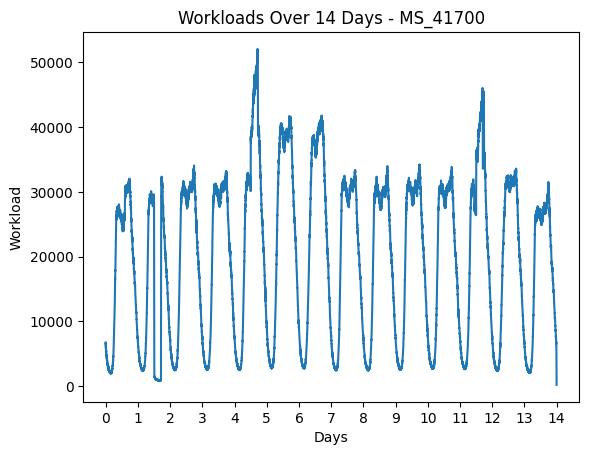

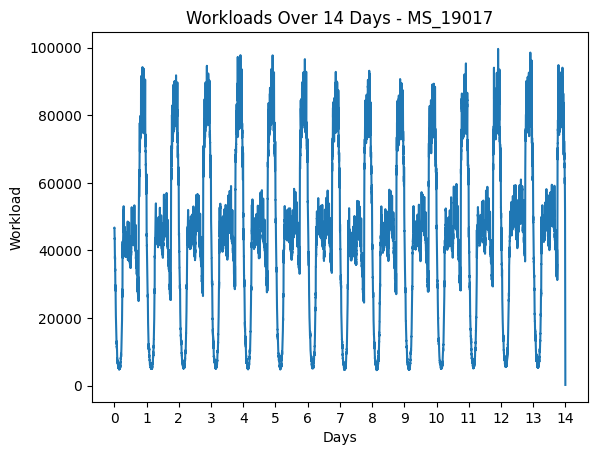

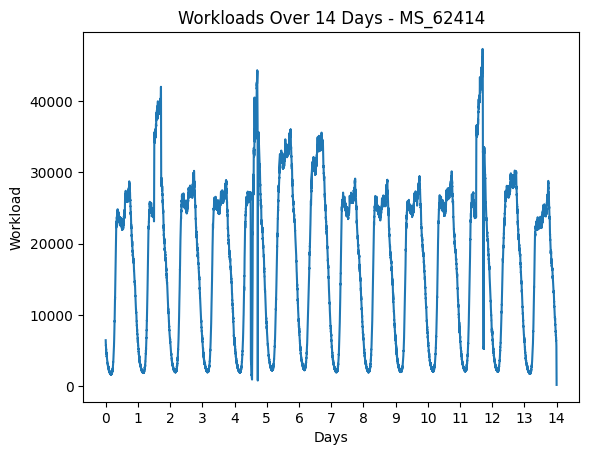

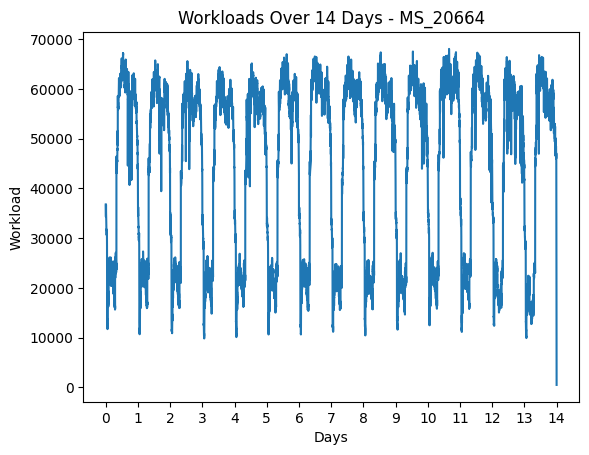

In [164]:
from src.plot import plot_microservice_workload

for i in range(len(workloads_for_sampled_microservices)):
    sampled_microservice = sampled_microservices[i]
    workloads_for_sampled_microservice = workloads_for_sampled_microservices[i]
    plot_microservice_workload(sampled_microservice, workloads_for_sampled_microservice)

In [158]:
import pandas as pd

data_df = pd.read_parquet('/Users/ashfaq/Documents/traces/final_data_files/data_0.parquet')

In [108]:
import pickle

def get_k_neighbor_sets(node, k):
    i_node_set = set()
    u_node_set = set()
    
    def get_nested_k_neighbor_sets(graph, current_node, current_k, node_set):
        if current_k == 0:
            return
        
        node_set.add(current_node)
        
        neighbors = graph.get(current_node, {})
        for neighbor, _ in neighbors.items():
            get_nested_k_neighbor_sets(graph, neighbor, current_k - 1, node_set)
    
    with open('/Volumes/EXTERNALHDD/traces/data_stats_aggregated/downstream_graph.pickle', 'rb') as file:
        downstream_graph = pickle.load(file)
    
    with open('/Volumes/EXTERNALHDD/traces/data_stats_aggregated/upstream_graph.pickle', 'rb') as file:
        upstream_graph = pickle.load(file)
        
    get_nested_k_neighbor_sets(downstream_graph, node, k, i_node_set)
    get_nested_k_neighbor_sets(upstream_graph, node, k, u_node_set)
    return i_node_set, u_node_set

In [109]:
from src.preprocess.functions import get_node_label_encoder

label_encoder = get_node_label_encoder()
labels = label_encoder.transform(['MS_41700', 'MS_19017', 'MS_62414', 'MS_20664'])

In [110]:
labels

array([32235,  9383, 53163, 11021])

In [111]:
i_set_1, u_set_1 = get_k_neighbor_sets(32235, 3)

In [112]:
len(i_set_1), len(u_set_1), len(i_set_1 | u_set_1)

(2225, 2, 2225)

In [113]:
i_set_2, u_set_2 = get_k_neighbor_sets(9383, 3)

In [114]:
len(i_set_2), len(u_set_2), len(i_set_2 | u_set_2)

(547, 2, 547)

In [115]:
i_set_3, u_set_3 = get_k_neighbor_sets(53163, 3)

In [116]:
len(i_set_3), len(u_set_3), len(i_set_3 | u_set_3)

(1747, 2, 1747)

In [117]:
i_set_4, u_set_4 = get_k_neighbor_sets(11021, 3)

In [118]:
len(i_set_4), len(u_set_4), len(i_set_4 | u_set_4)

(1043, 2062, 2427)

In [129]:
total_set = i_set_2 | u_set_2 | i_set_3 | u_set_3 | i_set_4 | u_set_4

In [130]:
len(total_set)

4272

In [190]:
import pandas as pd

df = pd.read_parquet('/Volumes/EXTERNALHDD/traces/filtered_data_files/data_9.parquet')

In [191]:
df

,u,i,ts,idx,rt,0,1,2,3,4
32313788,1332,5048,540000,32313789,1.0,0.0,0.0,0.0,0.0,1.0
32313791,4248,3860,540000,32313792,8.0,0.0,0.0,0.0,0.0,1.0
32313792,5166,5166,540000,32313793,NaN,0.0,0.0,0.0,0.0,1.0
32313793,5166,5166,540000,32313794,NaN,0.0,0.0,0.0,0.0,1.0
32313794,5166,5166,540000,32313795,NaN,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
35812843,592,592,599999,35812844,0.0,0.0,0.0,0.0,0.0,1.0
35812846,5166,5166,599999,35812847,NaN,0.0,0.0,1.0,0.0,0.0
35812852,5125,711,599999,35812853,3.0,0.0,0.0,0.0,0.0,1.0
35812853,5166,5166,599999,35812854,NaN,0.0,0.0,1.0,0.0,0.0
